<p><span style="font-size:18px"><strong>R&eacute;alis&eacute; par </strong>:</span> <span style="font-family:Comic Sans MS,cursive"><span style="font-size:18px"><strong><span style="color:#f39c12">EL ATRACH ABDELLAH</span></strong></span></span><br />
<span style="font-size:18px"><strong>Encadr&eacute; par</strong> :</span> <span style="font-family:Comic Sans MS,cursive"><span style="color:#f39c12"><strong><span style="font-size:18px">Pr. RACHID AIT DAOUD</span></strong></span></span></p>

# <h1 style="text-align:center"><span style="font-family:Comic Sans MS,cursive"><span style="font-size:48px"><strong>MINI PROJET  </strong></span></span></h1> 

# Partie 1 

In [1]:
import pandas as pd

#### 1. Faire les traitements nécessaires pour charger et fusionner les fichiers.

In [2]:
file1= pd.read_csv('dataset_P1(Nov2013-June2014).csv', delimiter=";", decimal=',' )

In [3]:
file2 = pd.read_csv('dataset_P2(July2014-January2015).csv', delimiter=";", decimal=',')

In [4]:
file2.rename(columns={ 'm':'Price' }, inplace=True)

In [5]:
data = pd.concat ( [file1, file2])

In [6]:
data

,Customer_ID,Date_purchase,Price
0,1,02/11/2013,69
1,2,04/11/2013,350
2,3,05/11/2013,69
3,4,07/11/2013,120
4,5,07/11/2013,120
...,...,...,...
5915,1715,26/08/2014,301.0
5916,1715,31/10/2014,35.0
5917,1715,27/09/2014,35.0
5918,1715,16/07/2014,248.0


#### 2. Pour chaque colonne donner le nombre de valeurs manquantes.

In [7]:
data.isna().sum()

Customer_ID       0
Date_purchase    15
Price            12
dtype: int64

#### 3. Afficher un data frame avec toutes les lignes qui ont au moins une valeur manquante.

In [8]:
data[data.isna().any(axis=1)]

,Customer_ID,Date_purchase,Price
65,36,NaN,784
194,57,01/12/2013,NaN
230,64,NaN,NaN
278,74,NaN,444
318,77,01/03/2014,NaN
351,81,NaN,343
453,94,NaN,NaN
519,104,NaN,97
584,113,NaN,48
636,123,08/03/2014,NaN


#### 4. Supprimer ensuite toutes les lignes avec des valeurs manquantes

In [9]:
DATA= data.dropna()

#### 5. Vérifier les dates des transactions afin de garder que celles qui sont effectuées par les clients dans la période d’étude. 

In [10]:
DATA['Date_purchase'] = pd.to_datetime(DATA['Date_purchase'], errors='coerce')

C:\Users\abdel\AppData\Local\Temp\ipykernel_1332\1927769806.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  DATA['Date_purchase'] = pd.to_datetime(DATA['Date_purchase'], errors='coerce')
C:\Users\abdel\AppData\Local\Temp\ipykernel_1332\1927769806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA['Date_purchase'] = pd.to_datetime(DATA['Date_purchase'], errors='coerce')


In [11]:
DATA=DATA[(DATA['Date_purchase'] >= '2013-11-01') | (DATA['Date_purchase'] <= '2015-02-28')]

#### 6. Afficher les statistiques descriptives de bas

In [12]:
DATA.describe()

,Customer_ID
count,12687.000000
mean,739.297470
std,465.792575
min,1.000000
25%,356.000000
50%,632.000000
75%,1122.000000
max,1717.000000


#### 7. Vérifier s’il y a des valeurs aberrantes.

In [13]:
DATA.isna().sum()

Customer_ID      0
Date_purchase    0
Price            0
dtype: int64

In [14]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12687 entries, 0 to 5919
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Customer_ID    12687 non-null  int64         
 1   Date_purchase  12687 non-null  datetime64[ns]
 2   Price          12687 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 396.5+ KB


#### 8. Quel est le mois qui a enregistré le plus grand nombre de ventes ? et quel est le montant total de ce mois ?

In [15]:
DATA['Month']= pd.DatetimeIndex(DATA['Date_purchase']).month_name()

In [16]:
DATA['Price']=pd.to_numeric(DATA['Price'], errors='coerce')

In [17]:
DATA=DATA.dropna()
DATA.isna().sum()

Customer_ID      0
Date_purchase    0
Price            0
Month            0
dtype: int64

In [18]:
dt=DATA.groupby('Month')['Price'].sum()
DATA.groupby('Month')['Price'].sum().idxmax()

'November'

#### 9. Afficher un graphe qui montre l’évolution du montant total par mois

In [19]:
import matplotlib.pyplot as plt

<AxesSubplot: title={'center': 'l’evolution du montant total par mois'}, xlabel='Mois', ylabel='Montant'>

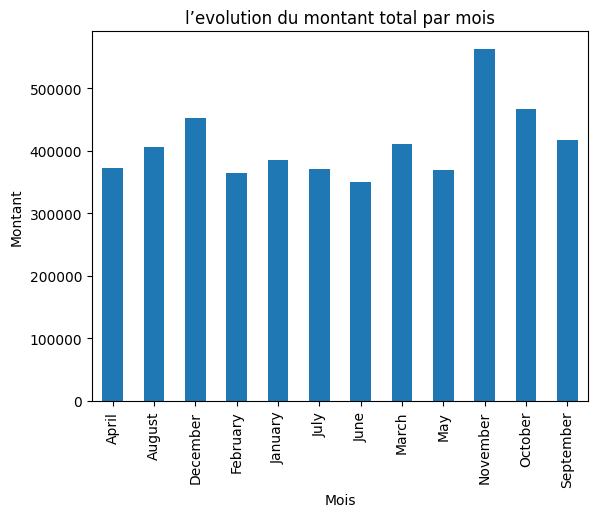

In [20]:
dt.plot.bar(title='l’evolution du montant total par mois', xlabel='Mois', ylabel='Montant')

#### 10. Pour chaque client, Créer les variables suivantes :
###### a. Fréquence : Nombre de transactions observées au cours de la période analysée.
###### b. Récence : le nombre de jours entre le premier jour de la période d'étude et le jour du dernier achat.
###### c. Longueur : nombre de jours entre le premier et le dernier achat (Longueur de la relation client/site e-commerce)
###### d. Montant : le montant total dépensé par le client au cours de la période analysée. (MAD)
###### e. NbrP1 : indique le nombre des transactions observées dans la première période.
###### f. NbrP2 : indique le nombre des transactions observées dans la deuxième période.
###### g. Inter_achat : Nombre moyen de jours entre les achats.


In [21]:
new_df=DATA.groupby('Customer_ID').agg(Frequence= ('Date_purchase', 'count'), Recense= ('Date_purchase', lambda x : (x.max() - pd.to_datetime('01/11/2013')).days), 
                                Longeur= ('Date_purchase', lambda x: (x.max() - x.min()).days ), Montant = ('Price', 'sum'), NbrP1 = ('Date_purchase', lambda x : (x<= pd.to_datetime('31/10/2014')).sum()), 
                                 NbrP2= ('Date_purchase', lambda x: (x<= pd.to_datetime('28/02/2015')).sum()))

C:\Users\abdel\AppData\Local\Temp\ipykernel_1332\3245502780.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Longeur= ('Date_purchase', lambda x: (x.max() - x.min()).days ), Montant = ('Price', 'sum'), NbrP1 = ('Date_purchase', lambda x : (x<= pd.to_datetime('31/10/2014')).sum()),
C:\Users\abdel\AppData\Local\Temp\ipykernel_1332\3245502780.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  NbrP2= ('Date_purchase', lambda x: (x<= pd.to_datetime('28/02/2015')).sum()))


In [22]:
import numpy as np
new_df['inter_achat'] = np.where(new_df['Frequence']== 1, new_df['Longeur']/new_df['Frequence'], new_df['Longeur']/new_df['Frequence']-1)
new_df

,Frequence,Recense,Longeur,Montant,NbrP1,NbrP2,inter_achat
Customer_ID,,,,,,,
1,1,31,0,69.0,1,1,0.000000
2,1,90,0,350.0,1,1,0.000000
3,1,120,0,69.0,1,1,0.000000
4,1,181,0,120.0,1,1,0.000000
5,1,181,0,120.0,1,1,0.000000
...,...,...,...,...,...,...,...
1713,3,688,260,1464.0,2,3,85.666667
1714,5,353,140,951.0,5,5,27.000000
1715,12,685,504,2616.0,10,12,41.000000


#### 11. Afficher les statistiques descriptives de base (min, max, moyenne, ecart type) pour les variables Longueur, Récence, Fréquence et Montant

In [23]:
desc=['mean','std','min','max']
new_df[['Frequence', 'Recense', 'Longeur', 'Montant']].agg(desc)

,Frequence,Recense,Longeur,Montant
mean,7.388468,598.330227,230.661037,2869.347117
std,5.387972,145.610366,148.714920,2834.170644
min,1.000000,1.000000,0.000000,69.000000
max,20.000000,1054.000000,812.000000,14805.000000


# Partie 2

#### 1. Comment interpréter la valeur 0 dans la colonne Inter_achat ? Remplacer cette valeur par la valeur moyenne de cette colonne (en prenant en compte que les valeurs différentes à zéro).

In [24]:
m = new_df.loc[new_df['inter_achat']!=0, 'inter_achat']
m.mean()

41.5835606886189

In [25]:
new_df['inter_achat'].replace(to_replace=0, value=m.mean(), inplace =True)
display(new_df)

,Frequence,Recense,Longeur,Montant,NbrP1,NbrP2,inter_achat
Customer_ID,,,,,,,
1,1,31,0,69.0,1,1,41.583561
2,1,90,0,350.0,1,1,41.583561
3,1,120,0,69.0,1,1,41.583561
4,1,181,0,120.0,1,1,41.583561
5,1,181,0,120.0,1,1,41.583561
...,...,...,...,...,...,...,...
1713,3,688,260,1464.0,2,3,85.666667
1714,5,353,140,951.0,5,5,27.000000
1715,12,685,504,2616.0,10,12,41.000000


#### 2. Sauvegarder le data frame final sous le nom "LRFMP1P2IT.xlsx".

In [26]:
new_df.to_excel('LRFMP1P2IT.xlsx')

#### 3. Charger le fichier généré par le modèle de clustering ("Clustering_Model_result.json")sous forme d’un DataFrame.

In [27]:
clustering_df= pd.read_json(r'C:\Users\abdel\OneDrive\Bureau\EST-FBS\Programmation Python\dataset-mini_projet\Clustering_Model_result.json')
display(clustering_df)

,Customer_ID,Frequency,Recency,Length,Monetary,Cluster
0,1,-1.185691,-2.011266,-1.219013,-0.988066,cluster_5
1,2,-1.185691,-1.996520,-1.219013,-0.888919,cluster_5
2,3,-1.185691,-1.989147,-1.219013,-0.988066,cluster_5
3,4,-1.185691,-1.974402,-1.219013,-0.970071,cluster_5
4,5,-1.185691,-1.974402,-1.219013,-0.970071,cluster_5
...,...,...,...,...,...,...
1712,1713,-0.814494,0.886274,0.996309,-0.495858,cluster_2
1713,1714,-0.443296,-1.583639,-1.031562,-0.676864,cluster_5
1714,1715,0.855894,0.967375,2.180654,-0.089390,cluster_1
1715,1716,-0.443296,-0.875843,-0.844112,0.006581,cluster_0


#### 4. Faire les traitements nécessaires pour ajouter au dernier DataFrame généré dans la partie 1, une nouvelle colonne nommé Cluster, qui indique le N° du Cluster de chaque client.

In [28]:
new_df = new_df.merge(clustering_df[[ 'Customer_ID', 'Cluster']], on="Customer_ID", how="left")
display(new_df)

,Customer_ID,Frequence,Recense,Longeur,Montant,NbrP1,NbrP2,inter_achat,Cluster
0,1,1,31,0,69.0,1,1,41.583561,cluster_5
1,2,1,90,0,350.0,1,1,41.583561,cluster_5
2,3,1,120,0,69.0,1,1,41.583561,cluster_5
3,4,1,181,0,120.0,1,1,41.583561,cluster_5
4,5,1,181,0,120.0,1,1,41.583561,cluster_5
...,...,...,...,...,...,...,...,...,...
1712,1713,3,688,260,1464.0,2,3,85.666667,cluster_2
1713,1714,5,353,140,951.0,5,5,27.000000,cluster_5
1714,1715,12,685,504,2616.0,10,12,41.000000,cluster_1
1715,1716,5,478,73,2888.0,5,5,13.600000,cluster_0


#### 5. Pour chaque groupe de client, calculer le nombre correspondant de clients, la longueur moyenne (L), la récence moyenne (R), la fréquence moyenne (F), le montant moyen (M).

In [29]:
cluster_df = new_df.groupby(by='Cluster').agg(count=('Cluster','count'),Meanl=('Longeur','mean'),MeanR=('Recense','mean'),MeanF=('Frequence','mean'),MeanM=('Montant','mean'))
display(cluster_df)

,count,Meanl,MeanR,MeanF,MeanM
Cluster,,,,,
cluster_0,262,269.645038,570.255725,7.419847,2644.549618
cluster_1,189,343.608466,694.005291,12.788360,4212.687831
cluster_2,339,276.799410,662.132743,5.147493,1723.233038
cluster_3,250,158.180000,670.396000,4.172000,1449.260000
cluster_4,138,311.420290,691.434783,15.014493,10454.202899
cluster_5,377,102.877984,402.079576,2.610080,891.283820
cluster_6,162,279.722222,664.783951,15.314815,4397.617284


#### 6. Ajouter une colonne nommée LRFM-Pattern qui va indiquer le pattern LRFM de chaque cluster (Comparer chaque valeur moyenne des clusters avec celle de la valeur moyenne total).


In [30]:
m_mean = new_df['Montant'].mean() 
f_mean = new_df['Frequence'].mean() 
r_mean = new_df['Recense'].mean()
l_mean = new_df['Longeur'].mean()

In [31]:
def checkM(row):
    if row['MeanM'] > m_mean:
        return "M"
    else:
        return "m"
def checkF(row):
    if row['MeanF'] > f_mean:
        return "F"
    else:
        return "f"
def checkR(row):
    if row['MeanR'] > r_mean:
        return "R"
    else:
        return "r"
def checkL(row):
    if row['Meanl'] > l_mean:
        return "L"
    else:
        return "l"
cluster_df['Pattern'] = cluster_df.apply(lambda x : checkL(x) + checkR(x)+checkF(x)+checkM(x),axis=1)
cluster_df

,count,Meanl,MeanR,MeanF,MeanM,Pattern
Cluster,,,,,,
cluster_0,262,269.645038,570.255725,7.419847,2644.549618,LrFm
cluster_1,189,343.608466,694.005291,12.788360,4212.687831,LRFM
cluster_2,339,276.799410,662.132743,5.147493,1723.233038,LRfm
cluster_3,250,158.180000,670.396000,4.172000,1449.260000,lRfm
cluster_4,138,311.420290,691.434783,15.014493,10454.202899,LRFM
cluster_5,377,102.877984,402.079576,2.610080,891.283820,lrfm
cluster_6,162,279.722222,664.783951,15.314815,4397.617284,LRFM


#### 7. Interpréter les résultats trouvés (Essayer d’expliquer les habitudes ou bien les comportements d’achats de chaque cluster en se basant sur le modèle LRFM).

#### Interpretation
**LRFM** : Ce sont des clients très précieux pour l'entreprise, qui achètent souvent et de manière récente, et qui dépensent de grandes sommes d'argent.

**lrFm** : le client a une valeur à vie relativement faible pour l'entreprise, qu'il n'achète pas souvent et que ses achats sont anciens, et qu'il ne dépense pas beaucoup d'argent à chaque achat.

**LRfm** : le client a une valeur à vie élevée pour l'entreprise, mais qu'il n'achète pas souvent et que ses achats sont récents, et qu'il ne dépense pas beaucoup d'argent à chaque achat.

**lRfm** : le client a une valeur à vie relativement faible pour l'entreprise, qu'il n'achète pas souvent et que ses achats sont récents, et qu'il ne dépense pas beaucoup d'argent à chaque achat.

**lrfm** : Ce sont des clients qui ne sont pas très précieux pour l'entreprise, qui n'achètent pas souvent et dont les achats sont anciens, et qui ne dépensent pas beaucoup d'argent à chaque achat.

#### 8. Réaliser les visualisations suivantes :
##### a. Nombre de clients par Cluster
##### b. Total dépensé par Cluster
##### c. Nombre de transaction par Cluster
##### d. Panier moyen par Cluste

In [32]:
import matplotlib.pyplot as plt

In [33]:
graph_cluster_df = cluster_df = new_df.groupby(by='Cluster').agg(transactions=('Frequence','sum'),
                                                                 client_per_cluster=('Customer_ID','count'),
                                                                 TotalDepense=('Montant','sum'),
                                                                 Panier_Moyen=('Montant','mean')
                                                                ).reset_index()
graph_cluster_df

,Cluster,transactions,client_per_cluster,TotalDepense,Panier_Moyen
0,cluster_0,1944,262,692872.0,2644.549618
1,cluster_1,2417,189,796198.0,4212.687831
2,cluster_2,1745,339,584176.0,1723.233038
3,cluster_3,1043,250,362315.0,1449.260000
4,cluster_4,2072,138,1442680.0,10454.202899
5,cluster_5,984,377,336014.0,891.283820
6,cluster_6,2481,162,712414.0,4397.617284


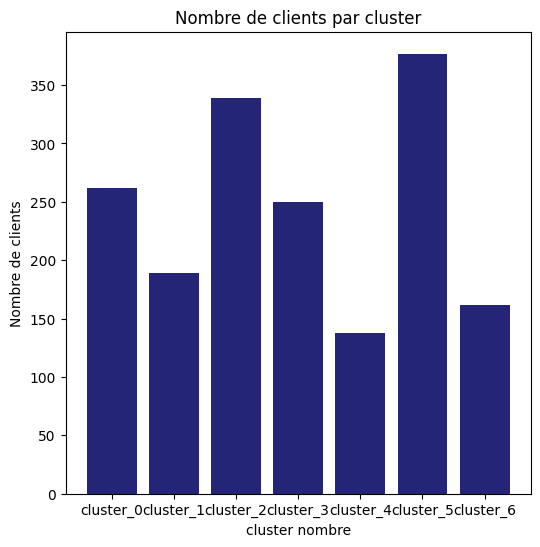

In [34]:
fig = plt.figure(figsize=(6,6))
plt.bar(graph_cluster_df['Cluster'],graph_cluster_df['client_per_cluster'],color='#252577')
plt.title('Nombre de clients par cluster')
plt.xlabel('cluster nombre');plt.ylabel('Nombre de clients')
plt.show()

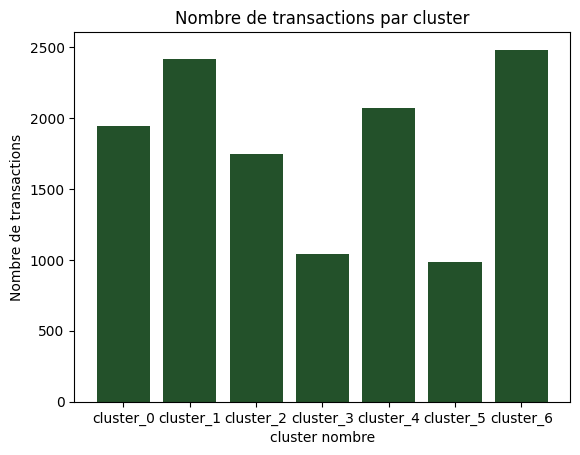

In [35]:
plt.bar(graph_cluster_df['Cluster'],graph_cluster_df['transactions'],color='#23512a')
plt.title('Nombre de transactions par cluster')
plt.xlabel('cluster nombre');plt.ylabel('Nombre de transactions')
plt.show()

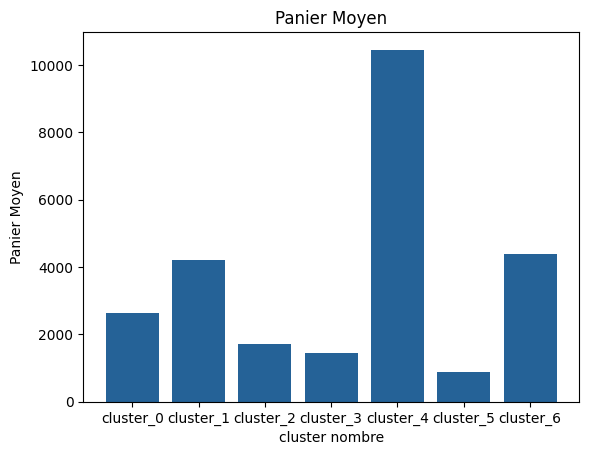

In [36]:
plt.bar(graph_cluster_df['Cluster'],graph_cluster_df['Panier_Moyen'],color='#256297')
plt.title('Panier Moyen')
plt.xlabel('cluster nombre');plt.ylabel('Panier Moyen')
plt.show()

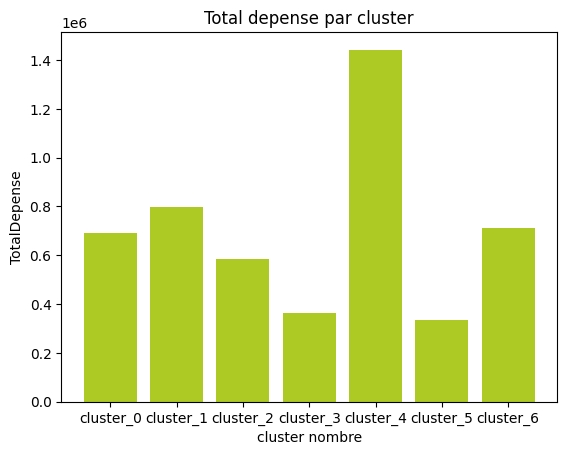

In [37]:
plt.bar(graph_cluster_df['Cluster'],graph_cluster_df['TotalDepense'],color='#acca23')
plt.title('Total depense par cluster')
plt.xlabel('cluster nombre');plt.ylabel('TotalDepense')
plt.show()